Processing Brasília, Brazil...
✓ Map of Brasília, Brazil saved to images/Brasília.png
⏩ Skipping Palmanova, Italy (already exists)
⏩ Skipping Versailles, France (already exists)
⏩ Skipping Karlsruhe, Germany (already exists)
Processing Canberra, Australia...
✓ Map of Canberra, Australia saved to images/Canberra.png
⏩ Skipping Washington, D.C., USA (already exists)
⏩ Skipping Ciudad Lineal, Spain (already exists)
⏩ Skipping Manhattan, New York, USA (already exists)
⏩ Skipping Chicago, USA (already exists)
⏩ Skipping Greater London, UK (already exists)
⏩ Skipping Amsterdam, Netherlands (already exists)
⏩ Skipping Paris, France (already exists)
⏩ Skipping Fez, Morocco (already exists)
Processing Old Delhi, India...
✓ Map of Old Delhi, India saved to images/Old_Delhi.png
Processing Athens, Greece...
✓ Map of Athens, Greece saved to images/Athens.png


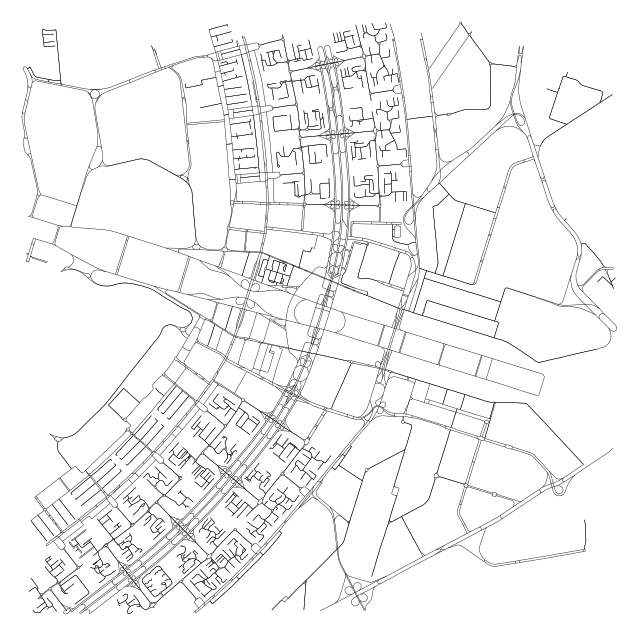

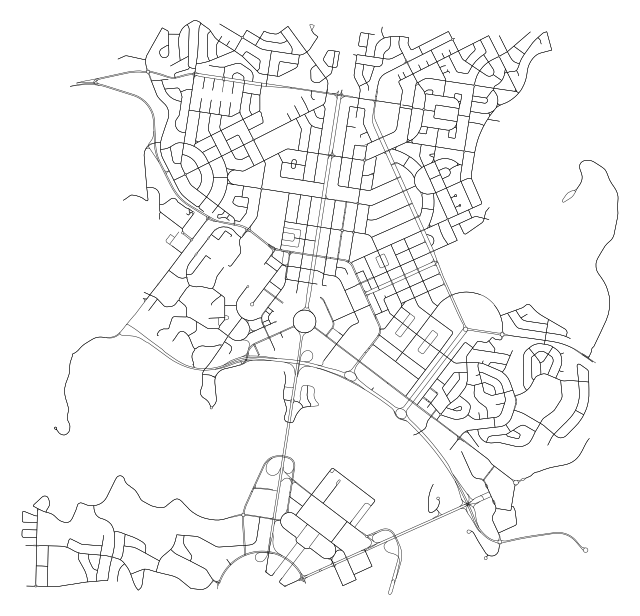

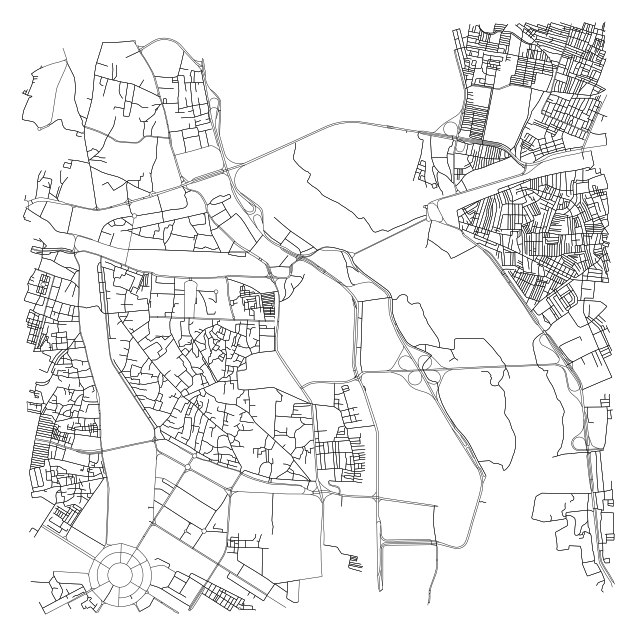

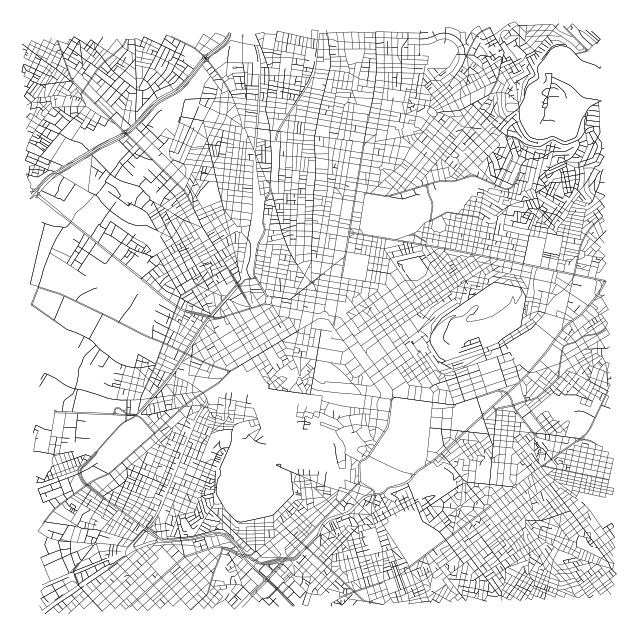

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("images", exist_ok=True)

# City list
cities = [
    "Brasília, Brazil",
    "Palmanova, Italy",
    "Versailles, France",
    "Karlsruhe, Germany",
    "Canberra, Australia",
    "Washington, D.C., USA",
    "Ciudad Lineal, Spain",
    "Manhattan, New York, USA",
    "Chicago, USA",
    "Greater London, UK",
    "Amsterdam, Netherlands",
    "Paris, France",
    "Fez, Morocco",
    "Old Delhi, India",
    "Athens, Greece",
]

# Fallbacks: (lat, lon) → smaller area fetch
fallback_cities = {
    "Brasília, Brazil": (-15.793889, -47.882778),
    "Canberra, Australia": (-35.2809, 149.13),
    "Old Delhi, India": (28.6562, 77.2410),
    "Athens, Greece": (37.9838, 23.7275),
}

for city in cities:
    try:
        filename = city.split(",")[0].replace(" ", "_") + ".png"
        filepath = os.path.join("images", filename)

        if os.path.exists(filepath):
            print(f"⏩ Skipping {city} (already exists)")
            continue

        print(f"Processing {city}...")

        if city in fallback_cities:
            point = fallback_cities[city]
            G = ox.graph_from_point(point, dist=3000, network_type="drive")
        else:
            G = ox.graph_from_place(city, network_type="drive")

        G_proj = ox.project_graph(G)

        fig, ax = ox.plot_graph(
            G_proj,
            bgcolor="white",
            node_color="black",
            node_size=0,
            edge_color="black",
            edge_linewidth=0.3,
            show=False,
            save=True,
            filepath=filepath,
            dpi=300,
        )

        print(f"✓ Map of {city} saved to {filepath}")

    except Exception as e:
        print(f"⚠️ Failed to process {city}: {e}")